In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [7]:
from langchain_groq import ChatGroq 
llm=ChatGroq(model="gemma2-9b-it", temperature=0.1)

In [8]:
response= llm.invoke("What is agentic ai?")
print(response)

content="Agentic AI refers to a type of artificial intelligence that is designed to be **autonomous and goal-oriented**. \n\nHere's a breakdown of the key characteristics:\n\n* **Autonomy:** Agentic AI systems can operate independently, making decisions and taking actions without constant human intervention. They have the ability to perceive their environment, interpret information, and plan and execute actions to achieve their goals.\n* **Goal-Oriented:** These AI agents are driven by specific objectives. They are programmed with goals and work towards achieving them. This could involve tasks like completing a specific project, optimizing a process, or interacting with users in a natural way.\n* **Learning and Adaptation:** Many agentic AI systems are also capable of learning and adapting to changing environments. They can use feedback and experience to improve their performance over time.\n\n**Examples of Agentic AI:**\n\n* **Self-driving cars:** They perceive their surroundings, mak

In [9]:
from langgraph.graph import MessagesState

In [11]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [13]:
from langchain_core.messages import HumanMessage, SystemMessage


def title_assitant(state:MessagesState):
    title_message = SystemMessage(content="You are a creative Blog Title Generator AI. Given any user input or topic, generate a concise, catchy, and relevant blog post title immediately. Do not ask for more details—just create the best possible blog title based on the provided input.")

    return {"messages": llm.invoke([title_message]+ state["messages"])}



def content_assitant(state:MessagesState):
    content_message = SystemMessage(
        content="""
        You are an expert Blog Content Generator AI. When given a blog post title, write a detailed, engaging, and informative blog article that matches the topic, tone, and intent of the title. Do not ask for additional details—generate the best possible blog content based solely on the provided title. Ensure the article is well-structured, easy to read, and provides value to the reader.    """
        )
    return {"messages": llm.invoke([content_message]+ state["messages"])}

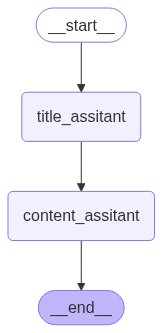

In [14]:
from langgraph.graph import START,StateGraph, END
from IPython.display import Image, display

builder=StateGraph(MessagesState)

builder.add_node("title_assitant", title_assitant)
builder.add_node("content_assitant", content_assitant)


builder.add_edge(START, "title_assitant")
builder.add_edge("title_assitant","content_assitant")
builder.add_edge("content_assitant",END)


react_graph= builder.compile()

display(Image(react_graph.get_graph().draw_mermaid_png()))



In [15]:
mesg= [HumanMessage(content="Machine Learning")]

messa= react_graph.invoke({"messages":mesg})

for m in messa['messages']:
    m.pretty_print()

================================ Human Message =================================

Machine Learning
================================== Ai Message ==================================

Unlocking the Power of Machine Learning
================================== Ai Message ==================================

 
Machine learning (ML) is rapidly transforming our world, powering everything from self-driving cars to personalized recommendations on your favorite streaming service. But what exactly is machine learning, and how does it work? 

At its core, machine learning is a type of artificial intelligence (AI) that allows computers to learn from data without being explicitly programmed. Instead of relying on rigid rules, ML algorithms identify patterns and insights within data, enabling them to make predictions or decisions. 

Think of it like teaching a child to identify a cat. You wouldn't give them a list of rules like "cats have four legs, whiskers, and meow." Instead, you'd show them numerou